In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df= pd.read_csv('/amazon_reviews_data.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


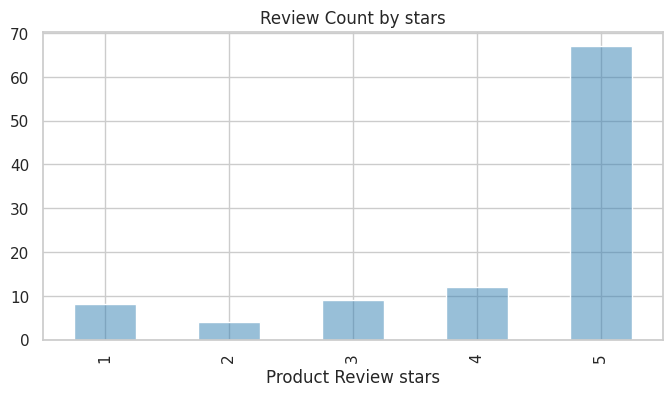

In [123]:
color = (0.2,
         0.5,
         0.7,
         0.5
         )
plot = df['Score'].value_counts().sort_index().plot(kind='bar',title='Review Count by stars',color= color, figsize=(8,4))
plot.set_xlabel('Product Review stars')
plt.show()

In [110]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL= f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [111]:
#Fuction
def Roberta_sentiment_analysis(text):
   encoded_text = tokenizer(text, return_tensors='pt')
   output = model(**encoded_text)
   scores = output[0][0].detach().numpy()
   scores=softmax(scores)
   val_dict={
    'negative': scores[0],
    'neutral': scores[1],
    'positive': scores[2]
               }
   return val_dict


new_dict = {}
for i,row in df.iterrows():
    try:
        text = row['Text']
        id = row['Id']
        result = Roberta_sentiment_analysis(text)
        new_dict[id] = result
    except RuntimeError:
        print(f'skipped')

#merging the dataframes
final_df = pd.DataFrame(new_dict).T
final_df = final_df.reset_index().rename(columns={'index': 'Id'})
final_df = final_df.merge(df, how='left')

skipped


In [115]:
final_df.head()

,Id,negative,neutral,positive,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


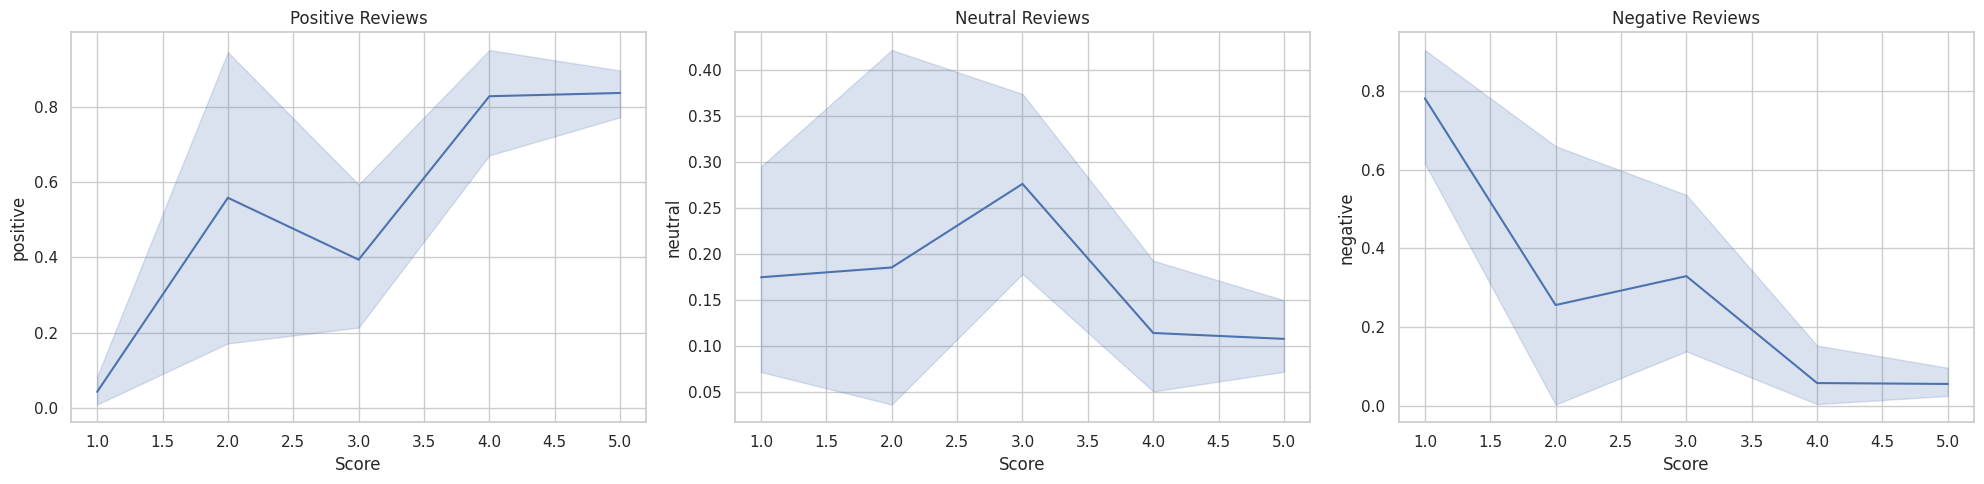

In [121]:
#Plotting
sns.set_theme(style="whitegrid")

fig, map = plt.subplots(1,3,figsize=(20,5))
sns.lineplot(data=final_df, x='Score', y='positive', ax=map[0])
sns.lineplot(data=final_df, x='Score', y='neutral', ax=map[1])
sns.lineplot(data=final_df, x='Score', y='negative', ax=map[2])

map[0].set_title('Positive Reviews')
map[1].set_title('Neutral Reviews')
map[2].set_title('Negative Reviews')
plt.tight_layout()
plt.show()